# 🧪 Data Mining Project Lab: Malaria Outbreak Prediction in Cameroon

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn geopandas plotly

In [ ]:
!pip install pyogrio


In [ ]:
!pip install geopandas


In [ ]:
!python -m pip install --upgrade pip


In [ ]:
!pip install plotly


## 📁 Step 1: Data Collection

In [1]:
import pandas as pd

# Load the new datasets
iot_df = pd.read_csv("Malaria outbrea Dataset_IoT_generated_and_Epidem.csv")
numerical_df = pd.read_csv("NUMERICAL_____Malaria outbrea Dataset_IoT_generated_and_Epidem.csv")

# Preview the datasets
print("IoT Dataset Preview:")
print(iot_df.head())

print("\nNumerical Dataset Preview:")
print(numerical_df.head())


IoT Dataset Preview:
  temp_level humidity precipitation frequency_outbreak_in_area  \
0        Low     High           Yes                       High   
1       High      Low            No                       High   
2       High     High           Yes                        Low   
3       High      Low           Yes                        Low   
4        Low     High           Yes                       High   

  travel_patterns        mosquito_species malaria_vectors  \
0             Low           Aedes aegypti              No   
1            High       Anopheles gambiae              No   
2            High  Culex quinquefasciatus              No   
3             Low       Anopheles gambiae             Yes   
4             Low           Aedes aegypti             Yes   

  vectors_infection_rates healthcare_availability healthcare_accessibility  \
0                     Low                     Yes                       No   
1                    High                     Yes          

## 🧼 Step 2: Data Preprocessing

In [4]:
# Handle missing values
iot_df.fillna(method='ffill', inplace=True)
numerical_df.fillna(method='ffill', inplace=True)

# Convert date columns if present
# Check if 'Date' column exists before converting
if 'Date' in iot_df.columns:
    iot_df['Date'] = pd.to_datetime(iot_df['Date'], errors='coerce')
if 'Date' in numerical_df.columns:
    numerical_df['Date'] = pd.to_datetime(numerical_df['Date'], errors='coerce')

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = numerical_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df[numerical_features] = scaler.fit_transform(numerical_df[numerical_features])


C:\Users\JA 12\AppData\Local\Temp\ipykernel_40600\1877357454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iot_df.fillna(method='ffill', inplace=True)
C:\Users\JA 12\AppData\Local\Temp\ipykernel_40600\1877357454.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numerical_df.fillna(method='ffill', inplace=True)


## 📊 Step 3: Exploratory Data Analysis (EDA)

In [7]:
print(iot_df.columns)


Index(['temp_level', 'humidity', 'precipitation', 'frequency_outbreak_in_area',
       'travel_patterns', 'mosquito_species', 'malaria_vectors',
       'vectors_infection_rates', 'healthcare_availability',
       'healthcare_accessibility', 'malaria_treatment_success_rates',
       'land_use', 'mosquito_breeding_sites', 'stagnant_waters',
       'iot_air_quality', 'iot_water_quality', 'presence_of_vegetation',
       'outbreak_threshold'],
      dtype='object')


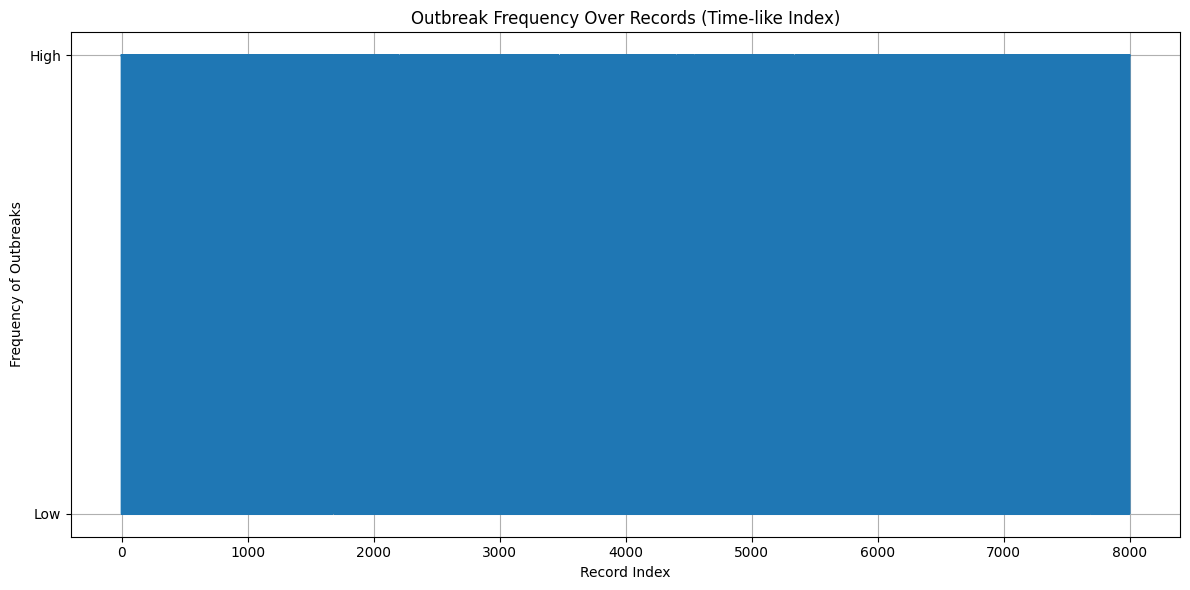

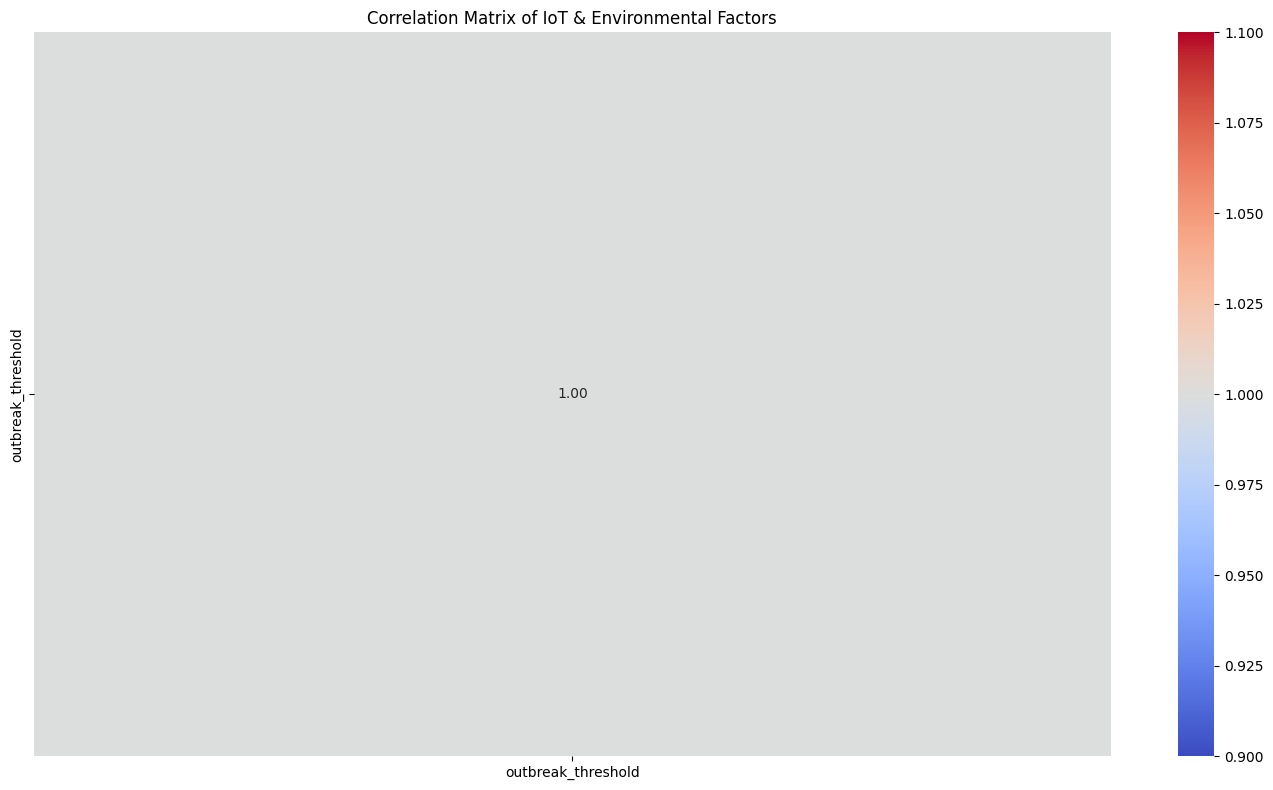

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot of malaria cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=iot_df, y='frequency_outbreak_in_area', x=iot_df.index)
plt.title("Outbreak Frequency Over Records (Time-like Index)")
plt.xlabel("Record Index")
plt.ylabel("Frequency of Outbreaks")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(iot_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of IoT & Environmental Factors")
plt.tight_layout()
plt.show()


## 🧠 Step 4: Modeling
Objective: Train machine learning models to predict malaria outbreaks.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target
features = numerical_df.drop(columns=['frequency_outbreak_in_area'])
target = numerical_df['frequency_outbreak_in_area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51       802
         1.0       0.52      0.55      0.53       798

    accuracy                           0.52      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.52      0.52      0.52      1600



## 🧪 Step 5: Evaluation
Objective: Create a geographic heatmap of malaria outbreaks.

In [19]:
import geopandas as gpd
try:
    import fiona
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'fiona'])
    import fiona
import plotly.express as px

# Load Cameroon shapefile
# Set the SHAPE_RESTORE_SHX config option
fiona.supported_drivers['ESRI Shapefile'] = 'rw'
cameroon_map = gpd.read_file("cmr_admbndl_admALL_inc_itos_20180104.shp", config_options={'SHAPE_RESTORE_SHX': 'YES'})

# Merge with outbreak data
merged_df = cameroon_map.merge(iot_df, left_on='Region_Name', right_on='Region')

# Plot the heatmap
fig = px.choropleth(merged_df,
                    geojson=merged_df.geometry,
                    locations=merged_df.index,
                    color="Malaria_Cases",
                    projection="mercator",
                    title="Geographic Distribution of Malaria Cases in Cameroon")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting fiona

Downloading fiona-1.10.1-cp39-cp39-win_amd64.whl.metadata (58 kB)

Collecting attrs>=19.2.0 (from fiona)

Downloading attrs-25.3.0-py3-none-any.whl.metadata (10 kB)

Requirement already satisfied: certifi in c:\users\ja 12\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (from fiona) (2023.7.22)

Collecting click~=8.0 (from fiona)

Downloading click-8.1.8-py3-none-any.whl.metadata (2.3 kB)

Collecting click-plugins>=1.0 (from fiona)

Downloading click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)

Collecting cligj>=0.5 (from fiona)

Downloading cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)

Requirement already satisfied: importlib-metadata in c:\users\ja 12\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (from fiona) (7.0.1)

Requirement already satisfied: colorama in c:\users\ja 12\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (from click~=8.0->fiona) (0.4.6)

Requirement already satisfied: zipp>=0.5 in c:\users\ja 12\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (from importlib-metadata->fiona) (3.17.0)

Downloading fiona-1.10.1-cp39-cp39-win_amd64.whl (24.5 MB)

C:\Users\JA 
12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site
-packages\pip\_vendor\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Downloading click-8.1.8-py3-none-any.whl (98 kB)

Downloading attrs-25.3.0-py3-none-any.whl (63 kB)

Downloading click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)

Downloading cligj-0.7.2-py3-none-any.whl (7.1 kB)

Installing collected packages: click, attrs, cligj, click-plugins, fiona

C:\Users\JA 12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\JA 12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\JA 12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pip\_vendor\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Successfully installed attrs-25.3.0 click-8.1.8 click-plugins-1.1.1 cligj-0.7.2 fiona-1.10.1

C:\Users\JA 12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CONFIG_OPTIONS
  return ogr_read(


DataSourceError: Unable to open cmr_admbndl_admALL_inc_itos_20180104.shx or cmr_admbndl_admALL_inc_itos_20180104.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

## 🚀 Step 6: Insights & Deployment

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')

In [ ]:
import joblib

joblib.dump(clf, "malaria_model.pkl")